In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
seeds = [13929, 39100, 61990, 10000, 76543]
marker_styles = ["o", "v", 's', 'p', '*']
colors = ['b', 'g', 'r', 'orange', 'purple']   

## Generate data

In [165]:
n = 20 # Number of datapoints in each subset

def generate_data(n, seed=None):
    if seed:
        np.random.seed(seed)
    x = np.random.choice(np.arange(1,10.5,0.5), [n])
    y = (10*np.log(x/2 + 0.5) + 2 + np.random.normal(0, 1, size=[n]))*10000
    return x, y

x, y = generate_data(n)

## Plot all subsets in one plot

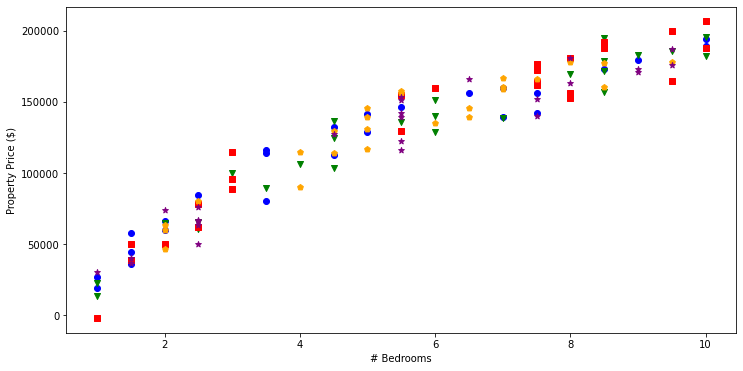

In [166]:
plt.figure(figsize=(12,6))
data = []
unseen_pt = (9, 175000)
for s,c,marker in zip(seeds, colors, marker_styles):
    
    n = 25
    x, y = generate_data(n, s)
    data.append((x,y))
    plt.scatter(x, y, c=c, marker=marker)
    plt.xlabel("# Bedrooms")
    plt.ylabel("Property Price ($)")

## Plot all datasets in separate plots

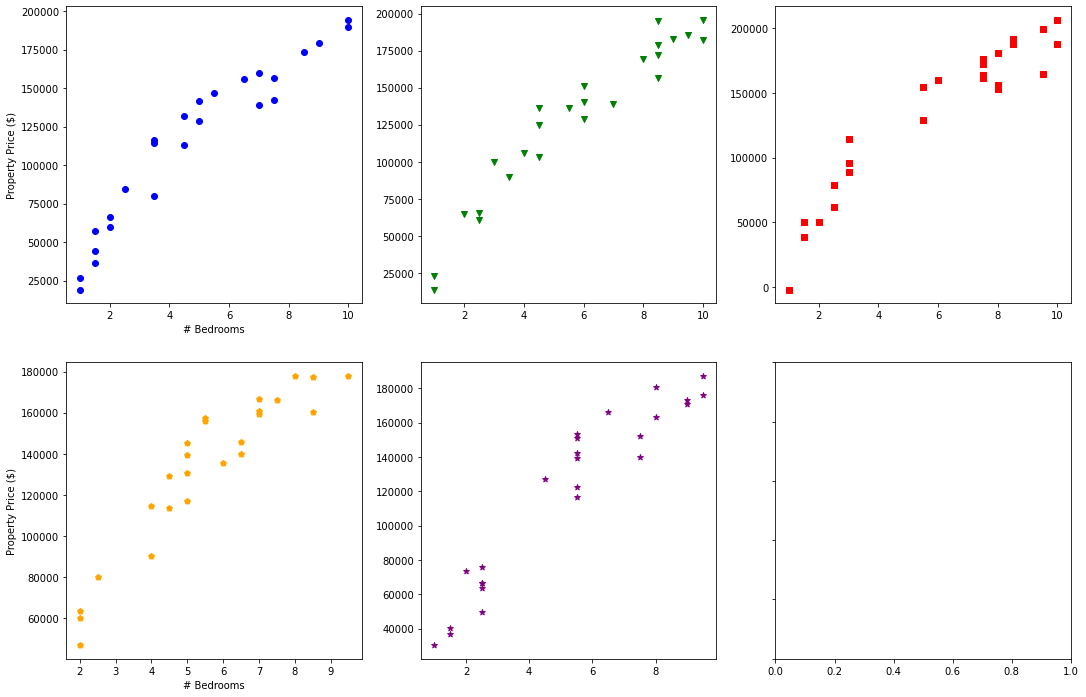

In [167]:
plt.subplots(2,3,figsize=(18,12), sharex='col', sharey=True)
i=1
for s,c,marker, d in zip(seeds, colors, marker_styles, data):
    plt.subplot(2,3,i)
    x, y = d
    plt.scatter(x, y, c=c, marker=marker)
    if i==1 or i==4:
        plt.xlabel("# Bedrooms")
        plt.ylabel("Property Price ($)")
    
    i += 1

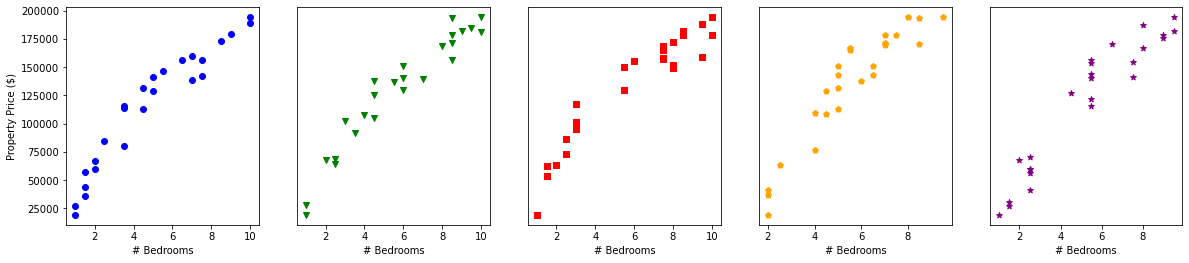

In [168]:
plt.subplots(1,5,figsize=(20,4), sharex='col', sharey=True)
i=1
for s,c,marker, d in zip(seeds, colors, marker_styles, data):
    plt.subplot(1,5,i)
    x, y = d
    plt.scatter(x, y, c=c, marker=marker)
    plt.xlabel("# Bedrooms")
    if i==1:
        
        plt.ylabel("Property Price ($)")
    else:
        plt.yticks([])
    i += 1

## Fitting LinearRegression models on data

In [183]:
from sklearn.linear_model import LinearRegression

infer_x = np.arange(1,10.5, 0.5)
infer_y = []
for x, y in data:
    
    lr = LinearRegression()
    lr.fit(x.reshape(-1,1), y)
    infer_y.append(lr.predict(infer_x.reshape(-1,1)))
    


Text(0, 0.5, 'Property Price ($)')

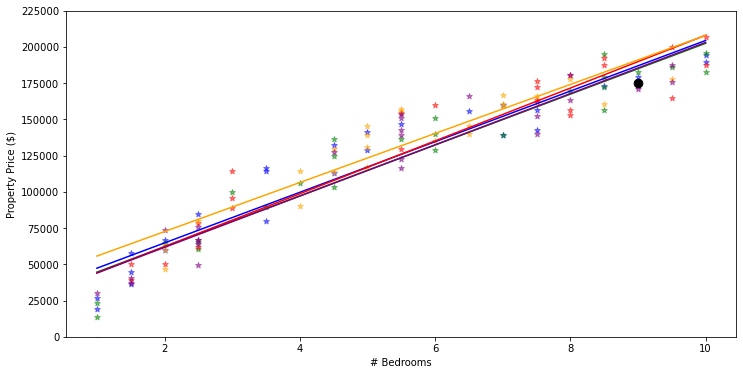

In [184]:
plt.figure(figsize=(12,6))

for d, y_hat, m, c in zip(data, infer_y, marker_styles,colors):
    x, y = d
    plt.scatter(x, y, c=c, alpha=0.5, marker=marker)
    plt.plot(infer_x, y_hat, c=c)#, marker=marker)

plt.scatter(*unseen_pt, color='black', s=75, zorder=100)  
plt.ylim(0, 225000)
plt.xlabel("# Bedrooms")
plt.ylabel("Property Price ($)")

## Fitting PolynomialRegression (degree=12) on the data

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
infer_x = np.arange(1,10.5, 0.5)
infer_y = []
for x, y in data:
    
    poly = PolynomialFeatures(degree=12)
    poly_x = poly.fit_transform(x.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(poly_x, y)
    
    infer_poly_x = poly.transform(infer_x.reshape(-1, 1))
    infer_y.append(lr.predict(infer_poly_x))
    


Text(0, 0.5, 'Property Price ($)')

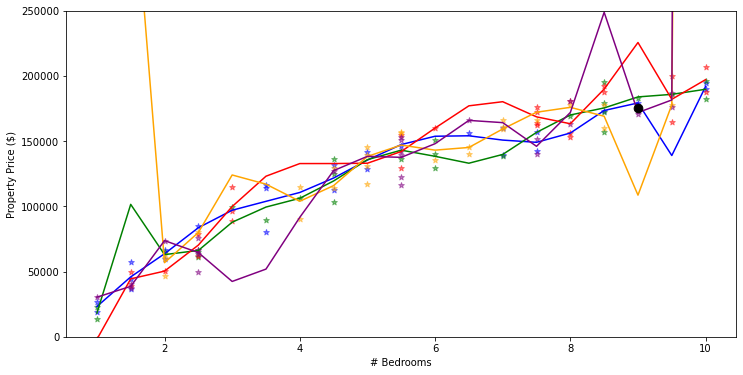

In [186]:
plt.figure(figsize=(12,6))


for d, y_hat, m, c in zip(data, infer_y, marker_styles,colors):
    x, y = d
    plt.scatter(x, y, c=c, alpha=0.5, marker=marker)
    plt.plot(infer_x, y_hat, c=c)#, marker=marker)

plt.scatter(*unseen_pt, color='black', s=75, zorder=100)
plt.ylim(0, 250000)
plt.xlabel("# Bedrooms")
plt.ylabel("Property Price ($)")

## Fitting a PolynomialRegression (degree=2) on the data

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
infer_x = np.arange(1,10.5, 0.5)
infer_y = []
for x, y in data:
    
    poly = PolynomialFeatures(degree=2)
    poly_x = poly.fit_transform(x.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(poly_x, y)
    
    infer_poly_x = poly.transform(infer_x.reshape(-1, 1))
    infer_y.append(lr.predict(infer_poly_x))
    


Text(0, 0.5, 'Property Price ($)')

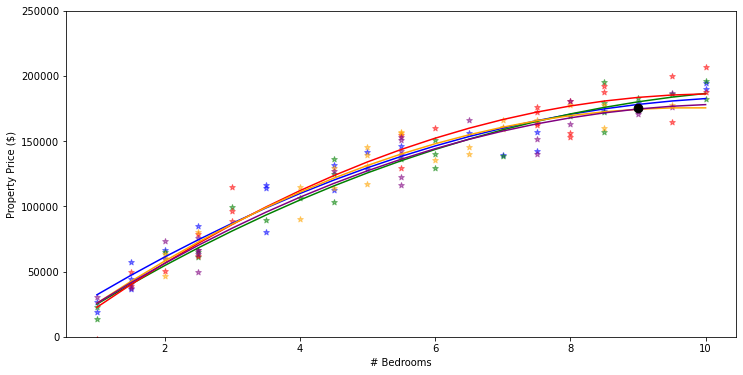

In [188]:
plt.figure(figsize=(12,6))


for d, y_hat, m, c in zip(data, infer_y, marker_styles,colors):
    x, y = d
    plt.scatter(x, y, c=c, alpha=0.5, marker=marker)
    plt.plot(infer_x, y_hat, c=c)#, marker=marker)

plt.scatter(*unseen_pt, color='black', s=75, zorder=100)
plt.ylim(0, 250000)
plt.xlabel("# Bedrooms")
plt.ylabel("Property Price ($)")